<a href="https://colab.research.google.com/github/sonu275981/My_Deep_learning_projects/blob/main/Image_classification_using_CNN_(CIFAR10_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

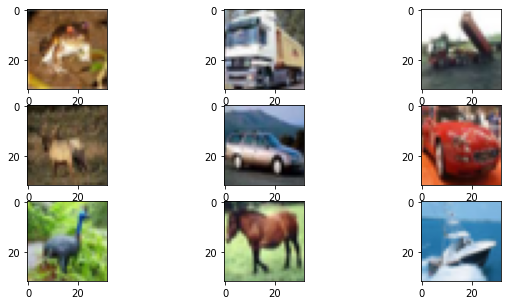

In [ ]:
#Plot some images 
n=9
plt.figure(figsize=(10,5))
for i in range(n):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i])
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [ ]:
#Convert the pixel values of the dataset to float type and then normalize the dataset
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
#one-hot encoding for target classes
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

Dense_valuee = y_test.shape[1]
Dense_valuee

10

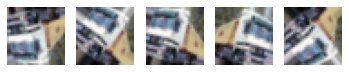

In [ ]:
# here i'm using Data Augmentation for better accuracy
from keras.preprocessing.image import ImageDataGenerator

#Data Augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,  
    zca_whitening=False,
    rotation_range=50,
    width_shift_range=0.01, 
    height_shift_range=0.01, 
    horizontal_flip=True, 
    vertical_flip=True)

datagen.fit(x_train)

from matplotlib import pyplot as plt

gen = datagen.flow(x_train[1:2], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()


In [ ]:
#initialize the classifier CNN
classifier = Sequential()

#applying convolution operation --> build the convolutional layer imp- we can add 2 layer of convolution and max pooling but here we r using only one
classifier.add(Convolution2D(32,(3,3), input_shape = (32,32,3), activation='relu',padding='same',kernel_constraint=maxnorm(3)))
classifier.add(Convolution2D(64,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
classifier.add(Convolution2D(128,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))

#Max Pooling --> create a pooling layer
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Convolution2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
classifier.add(Convolution2D(64,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
classifier.add(Convolution2D(128,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))

#Max Pooling --> create a pooling layer
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

#Flattening --> creating a long vector.
classifier.add(Flatten())

#classic ANN - full connection
classifier.add(Dense(128,activation='relu',kernel_constraint=maxnorm(3)))
classifier.add(Dense(64,activation='relu',kernel_constraint=maxnorm(3)))
classifier.add(Dropout(0.5))
classifier.add(Dense(Dense_valuee,activation='sigmoid'))

In [ ]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 32)        36896     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)       

In [ ]:
classifier.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
classifier.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=32)

Epoch 1/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.9634 - accuracy: 0.2720 - val_loss: 1.3955 - val_accuracy: 0.4961
Epoch 2/20
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4106 - accuracy: 0.4991 - val_loss: 1.0922 - val_accuracy: 0.6060
Epoch 3/20
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1710 - accuracy: 0.5912 - val_loss: 0.9795 - val_accuracy: 0.6536
Epoch 4/20
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0280 - accuracy: 0.6499 - val_loss: 0.9144 - val_accuracy: 0.6796
Epoch 5/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9229 - accuracy: 0.6909 - val_loss: 0.8948 - val_accuracy: 0.6908
Epoch 6/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8552 - accuracy: 0.7123 - val_loss: 0.8378 - val_accuracy: 0.7118
Epoch 7/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8018 - accuracy: 0.7279 - val_loss: 0.8435 -

In [ ]:
#Calculate its accuracy on testing data
acc=classifier.evaluate(x_test,y_test)
print(acc*100)

313/313 [==============================] - 1s 4ms/step - loss: 0.7465 - accuracy: 0.7568
[0.7464703917503357, 0.7567999958992004, 0.7464703917503357, 0.7567999958992004, 0.7464703917503357, 0.7567999958992004, 0.7464703917503357, 0.7567999958992004, 0.7464703917503357, 0.7567999958992004, 0.7464703917503357, 0.7567999958992004, 0.7464703917503357, 0.7567999958992004, 0.7464703917503357, 0.7567999958992004, 0.7464703917503357, 0.7567999958992004, 0.7464703917503357, 0.7567999958992004, 0.7464703917503357, 0.7567999958992004, 0.7464703917503357, 0.7567999958992004, 0.7464703917503357, 0.7567999958992004, 0.7464703917503357, 0.7567999958992004, 0.7464703917503357, 0.7567999958992004, 0.7464703917503357, 0.7567999958992004, 0.7464703917503357, 0.7567999958992004, 0.7464703917503357, 0.7567999958992004, 0.7464703917503357, 0.7567999958992004, 0.7464703917503357, 0.7567999958992004, 0.7464703917503357, 0.7567999958992004, 0.7464703917503357, 0.7567999958992004, 0.7464703917503357, 0.75679999

In [ ]:
#Save the model
classifier.save("model1_cifar_10epoch.h5")

Saving cat3.jpg to cat3.jpg
cat3.jpg, it is a automobile


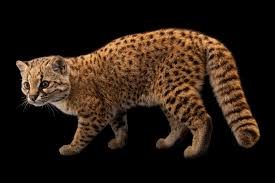

In [ ]:
# Test with random image
import numpy as np
from google.colab import files
from keras_preprocessing import image
from IPython.display import Image,display

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/'+ fn #save the image to content folder
  img = image.load_img(path, target_size = (32,32)) #load the image
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  value = classes = np.argmax(classifier.predict(images,batch_size=32),axis=-1) #predict the label for the image

  if classes[0]==0:
    print(fn + ', it is a aeroplane'),display(Image(fn)) #print the content

  elif classes[0]==1:
      print(fn + ', it is a automobile'),display(Image(fn)) #print the content

  elif classes[0]==2:
      print(fn + ', it is a bird'),display(Image(fn)) #print the content

  elif classes[0]==3:
      print(fn + ', it is a cat'),display(Image(fn)) #print the content

  elif classes[0]==4:
      print(fn + ', it is a deer'),display(Image(fn)) #print the content

  elif classes[0]==5:
      print(fn + ', it is a dog'),display(Image(fn)) #print the content

  elif classes[0]==6:
      print(fn + ', it is a frog'),display(Image(fn)) #print the content

  elif classes[0]==7:
      print(fn + ', it is a horse'),display(Image(fn)) #print the content

  elif classes[0]==8:
      print(fn + ', it is a ship'),display(Image(fn)) #print the content

  else:
      print(fn + ', it is a truck'),display(Image(fn)) #print the content
